# Tax Research Analysis Report
### Introduction
#### (1) What is this report for?
The purpose of this report is to provide a reference material for a Talent Acquisition Specialist in evaluating my qualification as a candidate for the Tax Research Analyst position at Avalara.

#### (2) Data sources
1. NC Tax Datasets: https://fred.stlouisfed.org/series/NCTLINCTAX
    1. Data description
        * DATE: First date (January 1st) of each fiscal year
        * NC~TAX: Certain tax collection in North Carolina, such as total income taxes, property taxes, etc.
2. 2019 Annual Survey of State Government Tax Collections: https://www.census.gov/data/tables/2019/econ/stc/2019-annual.html
    1. Data description:
        * Geo_Name: Name of each state in US
        * state_code: Number of state code, from 0 to 50
        * survey_year: Year of survey implemented, 2019	
        * Tax_Type: Type of tax collected
        * item: Tax code for a tax category
        * AMOUNT: Amount of tax collected

#### (3) References
1. Tax Survey: https://www.census.gov/econ/overview/go0600.html
2. Enacted Tax Legislation: https://www.taxpolicycenter.org/laws-proposals
3. NC Property Tax: https://www.ncdor.gov/local-government/property-tax
4. NC Office of Administrative Hearings: https://www.oah.nc.gov
5. Tax Categories: https://www.census.gov/govs/www/class_ch7_tax.html
6. State Tax Changes in Response to the Recession: https://www.cbpp.org/research/state-tax-changes-in-response-to-the-recession
        
### Objectives
1. To perform time-series analysis on taxes collected in North Carolia given the fiscal year of 1942 to 2019.
2. To perfrom graphical analysis on taxes collected in North Carolina in 2019

<a id='Table of Contents'></a>
### Table of Contents
1. Data Preparation & Cleaning
2. Time-Series Analysis
3. Graphical Analysis

## 1. Data Preparation & Cleaning

In this section, I will:
1. clean the original datasets that I downloaded from different sources
2. check out missing values and replace them with other proper values
3. organize and create a dataset for further analysis

In [1]:
# Set up the library path to install packages
.libPaths('C:/Users/james/anaconda3/Lib/R/library')

In [39]:
# Load packages
library(data.table)
library(skimr)
library(plyr)
library(dplyr)
library(naniar)
library(tidyr)
library(magrittr)
library(ggplot2)
library(plotly)
library(readxl)
library(htmltools)
library(RColorBrewer)
library(reshape2)

options(warn = -1)

In [3]:
# Set up working directory
setwd("C:/Users/james/Desktop/Coding/Kaggle/tax")

In [4]:
# Load state government tax datasets
df_inc <- fread("ncinctax.csv")
df_sales <- fread("ncsalestax.csv")
df_prop <- fread("ncproptax.csv")
df_lic <- fread("nctllictax.csv")
df_oth <- fread("nctlothtax.csv")

# Print the head of each dataset
head(df_inc)
head(df_sales)
head(df_prop)
head(df_lic)
head(df_oth)

DATE,NCINCTAX
1942-01-01,6177
1943-01-01,.
1944-01-01,11425
1945-01-01,.
1946-01-01,16058
1947-01-01,.


DATE,NCSALESTAX
1942-01-01,15663
1943-01-01,.
1944-01-01,19652
1945-01-01,.
1946-01-01,26555
1947-01-01,.


DATE,NCPROPTAX
1942-01-01,2786.0
1943-01-01,.
1944-01-01,3297.0
1945-01-01,.
1946-01-01,4020.0
1947-01-01,.


DATE,NCTLLICTAX
1942-01-01,18811
1943-01-01,.
1944-01-01,18987
1945-01-01,.
1946-01-01,21914
1947-01-01,.


DATE,NCTLOTHTAX
1942-01-01,1119
1943-01-01,.
1944-01-01,1082
1945-01-01,.
1946-01-01,1847
1947-01-01,.


In [5]:
# Check out the structure of each dataset
str(df_inc)
str(df_sales)
str(df_prop)
str(df_lic)
str(df_oth)

Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE    : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCINCTAX: chr  "6177" "." "11425" "." ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE      : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCSALESTAX: chr  "15663" "." "19652" "." ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	72 obs. of  2 variables:
 $ DATE     : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCPROPTAX: chr  "2786.0" "." "3297.0" "." ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE      : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCTLLICTAX: chr  "18811" "." "18987" "." ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE      : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NC

In [6]:
# Convert character variable to numeric variable in the datasets
df_inc$NCINCTAX <- as.numeric(df_inc$NCINCTAX)
df_prop$NCPROPTAX <- as.numeric(df_prop$NCPROPTAX)
df_sales$NCSALESTAX <- as.numeric(df_sales$NCSALESTAX)
df_lic$NCTLLICTAX <- as.numeric(df_lic$NCTLLICTAX)
df_oth$NCTLOTHTAX <- as.numeric(df_oth$NCTLOTHTAX)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [7]:
# Check out missing values and replace them with 0
miss_var_summary(df_inc)
df_inc[is.na(df_inc)] <- 0

miss_var_summary(df_prop)
df_prop[is.na(df_prop)] <- 0

miss_var_summary(df_sales)
df_sales[is.na(df_sales)] <- 0

miss_var_summary(df_lic)
df_lic[is.na(df_lic)] <- 0

miss_var_summary(df_oth)
df_oth[is.na(df_oth)] <- 0

variable,n_miss,pct_miss
NCINCTAX,4,5.128205
DATE,0,0.000000


variable,n_miss,pct_miss
NCPROPTAX,4,5.555556
DATE,0,0.000000


variable,n_miss,pct_miss
NCSALESTAX,4,5.128205
DATE,0,0.000000


variable,n_miss,pct_miss
NCTLLICTAX,4,5.128205
DATE,0,0.000000


variable,n_miss,pct_miss
NCTLOTHTAX,4,5.128205
DATE,0,0.000000


In [8]:
# Check out the structure of each dataset with changes reflected
str(df_inc)
str(df_sales)
str(df_prop)
str(df_lic)
str(df_oth)

Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE    : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCINCTAX: num  6177 0 11425 0 16058 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE      : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCSALESTAX: num  15663 0 19652 0 26555 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	72 obs. of  2 variables:
 $ DATE     : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCPROPTAX: num  2786 0 3297 0 4020 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE      : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCTLLICTAX: num  18811 0 18987 0 21914 ...
 - attr(*, ".internal.selfref")=<externalptr> 
Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE      : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCTLOTHTAX: num

In [9]:
# Create a dataframe to be added to the dataframe: df_prop
prop_date <- c("2014-01-01", "2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01")
prop_tax <- c(rep(c(0), time = 6))
prop <- c(prop_date, prop_tax)
prop_dum <- as.data.frame(matrix(prop, nrow = 6, ncol = 2))
colnames(prop_dum) <- c("DATE", "NCPROPTAX")

prop_dum$NCPROPTAX <- as.numeric(prop_dum$NCPROPTAX)
prop_dum$DATE <- as.IDate(prop_dum$DATE, format = "%Y-%m-%d")

df_proptx <- rbind(df_prop, prop_dum)
df_proptx$NCPROPTAX[73:78] <-0

tail(df_proptx)
str(df_proptx)

DATE,NCPROPTAX
2014-01-01,0
2015-01-01,0
2016-01-01,0
2017-01-01,0
2018-01-01,0
2019-01-01,0


Classes 'data.table' and 'data.frame':	78 obs. of  2 variables:
 $ DATE     : IDate, format: "1942-01-01" "1943-01-01" ...
 $ NCPROPTAX: num  2786 0 3297 0 4020 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [10]:
# Combine each datset into one dataset
df <- join_all(list(df_inc, df_proptx, df_sales, df_lic, df_oth), by = 'DATE', type = 'left')
head(df)
tail(df)

DATE,NCINCTAX,NCPROPTAX,NCSALESTAX,NCTLLICTAX,NCTLOTHTAX
1942-01-01,6177,2786,15663,18811,1119
1943-01-01,0,0,0,0,0
1944-01-01,11425,3297,19652,18987,1082
1945-01-01,0,0,0,0,0
1946-01-01,16058,4020,26555,21914,1847
1947-01-01,0,0,0,0,0


DATE,NCINCTAX,NCPROPTAX,NCSALESTAX,NCTLLICTAX,NCTLOTHTAX
2014-01-01,10390520,0,5842182,1706825,73959
2015-01-01,11197650,0,6862578,1755328,67165
2016-01-01,12042957,0,7187844,1884989,74342
2017-01-01,12086332,0,7656898,2249313,77327
2018-01-01,12609608,0,8009850,2197653,92630
2019-01-01,13258890,0,8461400,2327335,89760


## 2. Time-Series Analysis

1. In this section, I will perform time-series analysis, which analyzes the pattern or trend of the North Carolina's tax revenue given a period of fiscal years, from 1942 to 2019.
2. I arbitrarily selected five main categories of taxes for analysis:
    * Total income taxes
    * Property taxes 
    * General sales and gross receipts taxes
    * (Total) License taxes
    * Total Other taxes

In [29]:
# annotations
a <- list(
  x = df$DATE[66],
  y = df$NCINCTAX[66],
  text = "Subprime Mortgage Crisis",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = 10,
  ay = -40
)

# Plot income taxes
fig <- plot_ly(df, x = ~DATE, y = ~NCINCTAX, type = "scatter", mode = "lines")
fig <- fig %>%
        layout(annotations = a,
               title = "Total Income Taxes in North Carolina, 1942 ~ 2019",
               xaxis = list(title = "Date"),
               yaxis = list(title = "Total Income Taxes ($)")
              )
# fig

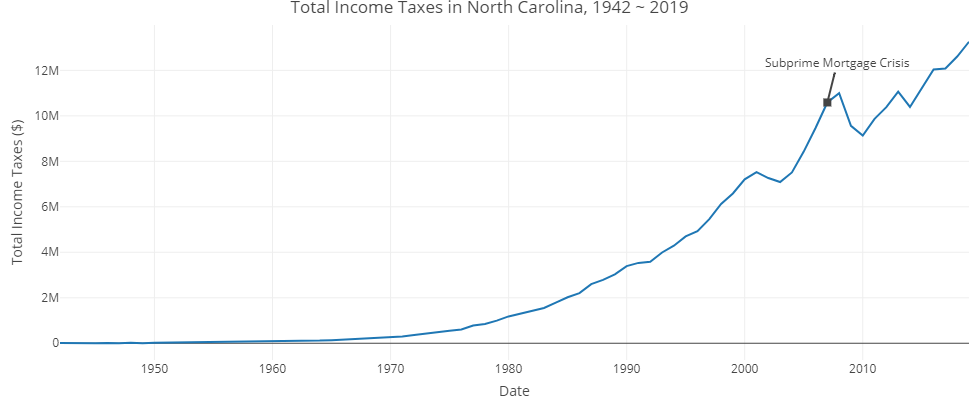

In [30]:
# Plot property taxes
fig <- plot_ly(df, x = ~DATE, y = ~NCPROPTAX, type = "scatter", mode = "lines")
fig <- fig %>%
        layout(title = "Property Taxes in North Carolina, 1942 ~ 2019",
               xaxis = list(title = "Date"),
               yaxis = list(title = "Property Taxes ($)")
              )
# fig

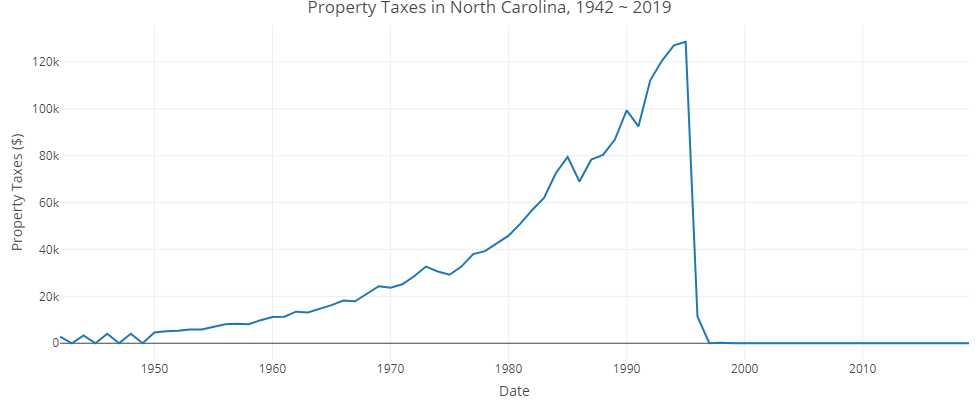

In [31]:
# annotations
a <- list(
  x = df$DATE[66],
  y = df$NCSALESTAX[66],
  text = "Subprime Mortgage Crisis",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = 10,
  ay = -50
)

# Plot sales taxes
fig <- plot_ly(df, x = ~DATE, y = ~NCSALESTAX, type = "scatter", mode = "lines")
fig <- fig %>%
        layout(annotations = a,
               title = "General Sales and Gross Receipts Taxes in North Carolina, 1942 ~ 2019",
               xaxis = list(title = "Date"),
               yaxis = list(title = "General Sales and Gross Receipts Taxes ($)")
              )
# fig

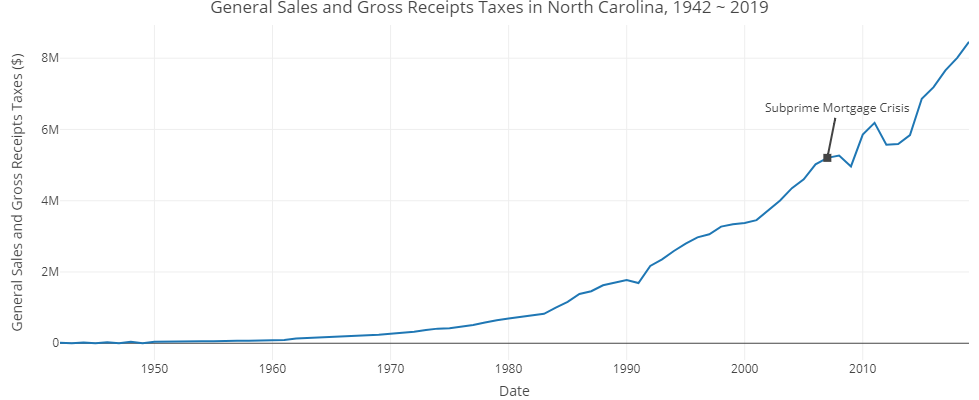

In [32]:
# annotations
a <- list(
  x = df$DATE[66],
  y = df$NCTLLICTAX[66],
  text = "Subprime Mortgage Crisis",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = 10,
  ay = -60
)

# Plot total license taxes
fig <- plot_ly(df, x = ~DATE, y = ~NCTLLICTAX, type = "scatter", mode = "lines")
fig <- fig %>%
        layout(annotations = a,
               title = "Total License Taxes in North Carolina, 1942 ~ 2019",
               xaxis = list(title = "Date"),
               yaxis = list(title = "Total License Taxes ($)")
              )
# fig

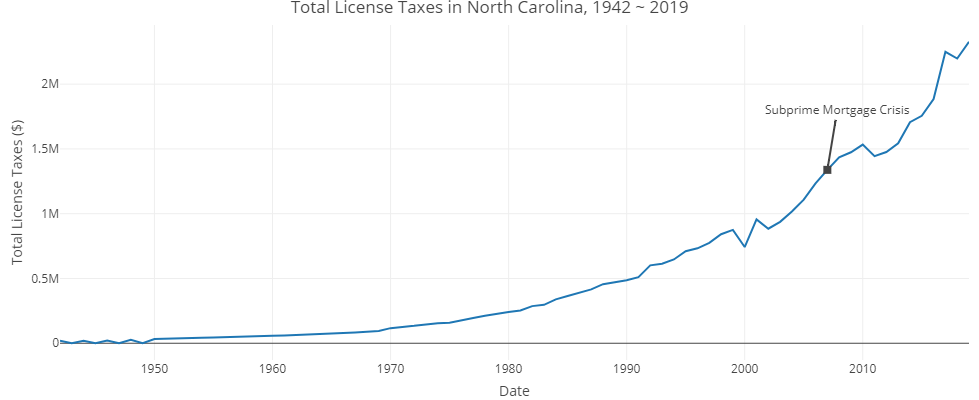

In [33]:
# annotations
a <- list(
  x = df$DATE[66],
  y = df$NCTLOTHTAX[66],
  text = "Subprime Mortgage Crisis",
  xref = "x",
  yref = "y",
  showarrow = TRUE,
  arrowhead = 7,
  ax = 20,
  ay = -40
)

# Plot total other taxes
fig <- plot_ly(df, x = ~DATE, y = ~NCTLOTHTAX, type = "scatter", mode = "lines")
fig <- fig %>%
        layout(annotations = a,
               title = "Total Other Taxes in North Carolina, 1942 ~ 2019",
               xaxis = list(title = "Date"),
               yaxis = list(title = "Total Other Taxes ($)")
              )
# fig

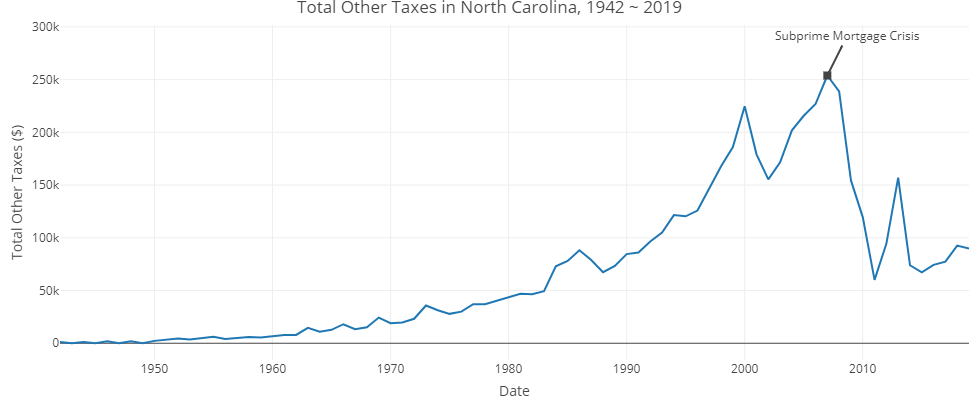

In [34]:
# Plot all taxes together
fig <- plot_ly(df, x = ~DATE, y = ~NCINCTAX, name = "Total Income Taxes", type = "scatter", mode = "lines")
fig <- fig %>% add_trace(y = ~NCPROPTAX, name = "Property Taxes", mode = "lines")
fig <- fig %>% add_trace(y = ~NCSALESTAX, name = "Sales and Gross Receipts Taxes", mode = "lines")
fig <- fig %>% add_trace(y = ~NCTLLICTAX, name = "Total License Taxes", mode = "lines")
fig <- fig %>% add_trace(y = ~NCTLOTHTAX, name = "Total Other Taxes", mode = "lines")
fig <- fig %>% layout(
                    title = "Tax Revenue Trends in North Carolina, 1942 ~ 2019",
                    xaxis = list(title = "Date"),
                    yaxis = list(title = "Amount ($)")
                    )
# fig

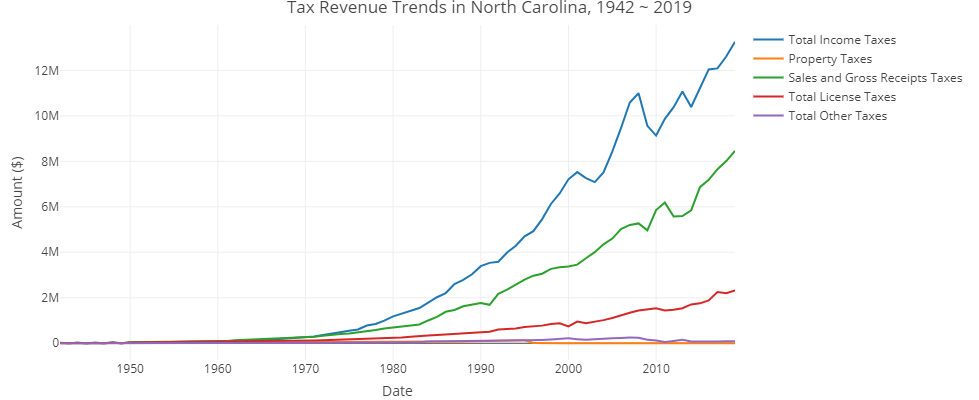

### Observations
1. Overall, the main categories of taxes in North Carolina have noticeably increased since 1980.
2. All taxes, except for the property taxes and the other taxes, have gradually increased with a little ups and downs.
3. There is no property taxes shown since 1997. Why? 
    * According to the census.gov, The United States Code, Title 13, authorizes the data collection and provides voluntary responses. It presumably means that since 1997, North Carolina have not responsed to provide the information of its property tax collection.
    * More importantly, the property tax in North Carolina is a locally assessed tax, collected by the counties. The NCDOR does not send proeprty tax bills or collect property taxes. 
        * Then, what NCDOR does?
        * Under North Carolina General Statute 105-289, The Department of Revenue is charged with the duty to exercise general and specific supervision over the valuation and taxation of property by taxing units throughout the State.
4. Subprime Mortgage Crisis Effects on the State-level of Taxation
    * Interestingly, looking at the graph of total income taxes, general sales and gross receipts taxes, and total other taxes, between 2007 and 2010, when the US financial market was under the effect of subprime mortgage crisis, a downward trend was explicitly indicated.
5. Let's scrutinize the downward trend shown in most taxes by computing differences in each tax amount and the rate of increase and decrease between 2007 and 2010.

### Subanalysis: Tax Revenue Trends in Subprime Mortgage Crisis, 2007 ~ 2010

In this section, I will:
1. Compute the differences in the amount of each tax category between 2007 and 2010
2. Compute the rate of increase or decrease of the differences in the amount of each tax category
3. Compare the results and search what action North Carolina took to cope with the crisis

In [17]:
# Extract a dataset between 2007 ~ 2010
df_0710 <- df[c(66:69), c(1:2, 4:6)]
df_0710

DATE,NCINCTAX,NCSALESTAX,NCTLLICTAX,NCTLOTHTAX
2007-01-01,10588951,5202423,1338413,253885
2008-01-01,10993927,5269929,1435665,238926
2009-01-01,9560353,4963434,1474278,154402
2010-01-01,9133689,5856993,1533688,119648


In [18]:
# Create a function to compute differences in all taxes between each fiscal year
for (i in 1:nrow(df_0710)) {
    
    diff_inc <- df_0710[i+1, 2] - df_0710[i, 2]
    diff_inc_pct <- abs(df_0710[i+1, 2] - df_0710[i, 2]) / df_0710[i, 2] * 100
    
    diff_sales <- df_0710[i+1, 3] - df_0710[i, 3]
    diff_sales_pct <- abs(df_0710[i+1, 3] - df_0710[i, 3]) / df_0710[i, 3] * 100
    
    diff_lic <- df_0710[i+1, 4] - df_0710[i, 4]
    diff_lic_pct <- abs(df_0710[i+1, 4] - df_0710[i, 4]) / df_0710[i, 4] * 100
    
    diff_oth <- df_0710[i+1, 5] - df_0710[i, 5]
    diff_oth_pct <- abs(df_0710[i+1, 5] - df_0710[i, 5]) / df_0710[i, 5] * 100
    
    if (i == 4) {
        break
    }
    
    diff_pct <- matrix(c(diff_inc_pct, diff_sales_pct, diff_lic_pct, diff_oth_pct), byrow = TRUE, nrow = 1)
    print(diff_pct)
}

     [,1]     [,2]     [,3]     [,4]    
[1,] 3.824515 1.297588 7.266218 5.892038
     [,1]     [,2]     [,3]     [,4]    
[1,] 13.03969 5.815923 2.689555 35.37664
     [,1]     [,2]     [,3]     [,4]    
[1,] 4.462848 18.00284 4.029769 22.50878


In [19]:
# Create a dataframe
date <- c("2007 - 2008", "2008 - 2009", "2009 - 2010")
inc <- c(404976, -1433574, -426664)
inc_pct <- c(3.82, -13.04, -4.46)
sal <- c(67506, -306495, 893559)
sal_pct <- c(1.30, -5.82, 18)
lic <- c(97252, 38613, 59410)
lic_pct <- c(7.27, 2.70, 4.03)
oth <- c(-14959, -84524, -34754)
oth_pct <- c(-5.89, -35.38, -22.51)
df_diff <- as.data.frame(matrix(c(date, inc, inc_pct, sal, sal_pct, lic, lic_pct, oth, oth_pct), nrow = 3, ncol = 9))
colnames(df_diff) <- c("Year", "NC_income_tax", "Inc_pct", "NC_sales_tax", "Sal_pct", 
                        "NC_license_tax", "Lic_pct", "NC_other_tax", "Oth_pct")

df_diff

Year,NC_income_tax,Inc_pct,NC_sales_tax,Sal_pct,NC_license_tax,Lic_pct,NC_other_tax,Oth_pct
2007 - 2008,404976,3.82,67506,1.3,97252,7.27,-14959,-5.89
2008 - 2009,-1433574,-13.04,-306495,-5.82,38613,2.7,-84524,-35.38
2009 - 2010,-426664,-4.46,893559,18,59410,4.03,-34754,-22.51


In [20]:
# Convert factor to numeric
df_diff$NC_income_tax <- as.numeric(as.character(df_diff$NC_income_tax))
df_diff$NC_sales_tax <- as.numeric(as.character(df_diff$NC_sales_tax))
df_diff$NC_license_tax <- as.numeric(as.character(df_diff$NC_license_tax))
df_diff$NC_other_tax <- as.numeric(as.character(df_diff$NC_other_tax))

df_diff$Inc_pct <- as.numeric(as.character(df_diff$Inc_pct))
df_diff$Sal_pct <- as.numeric(as.character(df_diff$Sal_pct))
df_diff$Lic_pct <- as.numeric(as.character(df_diff$Lic_pct))
df_diff$Oth_pct <- as.numeric(as.character(df_diff$Oth_pct))

str(df_diff)

'data.frame':	3 obs. of  9 variables:
 $ Year          : Factor w/ 3 levels "2007 - 2008",..: 1 2 3
 $ NC_income_tax : num  404976 -1433574 -426664
 $ Inc_pct       : num  3.82 -13.04 -4.46
 $ NC_sales_tax  : num  67506 -306495 893559
 $ Sal_pct       : num  1.3 -5.82 18
 $ NC_license_tax: num  97252 38613 59410
 $ Lic_pct       : num  7.27 2.7 4.03
 $ NC_other_tax  : num  -14959 -84524 -34754
 $ Oth_pct       : num  -5.89 -35.38 -22.51


In [35]:
# Extract tax amounts
df_diff_tax <- df_diff[ , c(1, 2, 4, 6, 8)]

# Convert a dataframe (wide datatype) to long datatype
df_diff_tax_1 <- melt(df_diff_tax, id.var = "Year")

# Plot the differences in major NC taxes
p <- ggplot(df_diff_tax_1, aes(x = Year, y = value, fill = variable)) +
        geom_bar(stat = "identity", position = "stack") +
        labs(x = "Fiscal Year", y = "Amount ($)", 
             title = "Fig 1: NC Tax Revenue Trends in Subprime Mortgage Crisis: 2007 ~ 2010") +
        theme(plot.title = element_text(hjust = 0.5))

fig <- ggplotly(p)
# fig

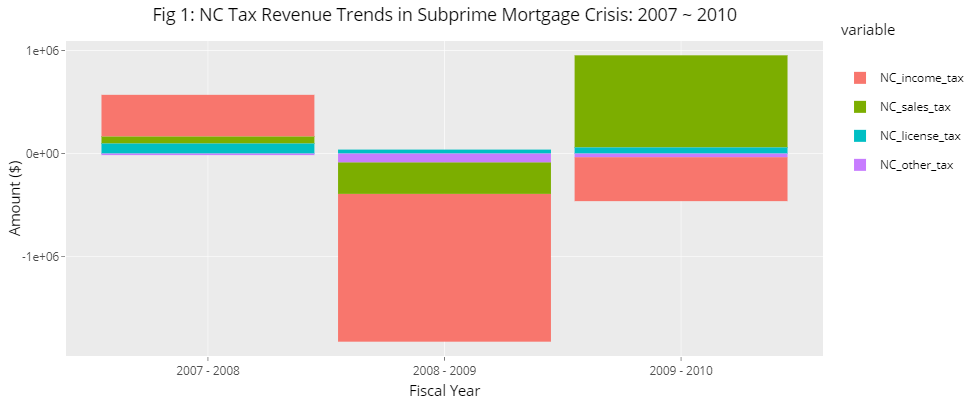

In [36]:
# Extract tax difference percentages
df_diff_pct <- df_diff[ , c(1, 3, 5, 7, 9)]

# Convert a dataframe (wide datatype) to long datatype
df_diff_pct_1 <- melt(df_diff_pct, id.var = "Year")

# Plot the differences in major NC taxes
p <- ggplot(df_diff_pct_1, aes(x = Year, y = value, fill = variable)) +
        geom_bar(stat = "identity", position = "stack") +
        labs(x = "Fiscal Year", y = "Percentage (%)", 
        title = "Fig 2: Rate of Increase / Decrease of Differences in Tax Revenue in Subprime Mortgage Crisis: 2007 ~ 2010") +
        theme(plot.title = element_text(hjust = 0.5))

fig <- ggplotly(p)
# fig

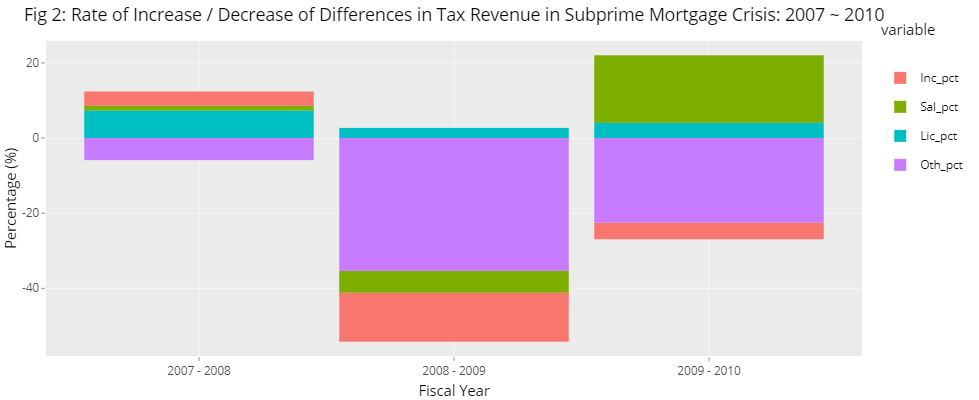

### Observations

1. Let's look at the Fig 1. Except for other taxes, all other taxes increased between 2007 and 2008.
2. However, the real effect of the recession came into play between 2008 and 2009. This time, except the license taxes, all other taxes drastically decreased. For example, the total income taxes decreased by 1.4M USD, which is about 13% decrease in 2009 compared to 2008.
3. Between 2009 and 2010, the total income taxes still decreased by 0.4M USD, but the amount of decrease was explicitly reduced. In the meantime, interestingly, the sales taxes increased by almost 0.9M USD, which is 18% increase in 2010 compared to 2009.
4. In Fig 2, in terms of the rate of decrease, overall, the other taxes had most drastically decreased compared to other taxes during this period of years.
5. In Fig 2, it is obvious that license taxes were not affected by the crisis, indicating 4.7% of the average rate of increase.

### What action North Carolina took?
#### Individual Income Taxes
1. North Carolina increased taxes primarily on high-income taxpayers, with new brackets and/or higher rates at upper income levels. And the high-income brackets were in place for two years, which expired later in January 2011.
2. In 2009, North Carolina placed a temporary surcharge on upper-income taxpayers, effective for tax years 2009 and 2010. This surcharge is added to the filer’s tax liability. Married filers with income over 250,000 USD and single filers with income over 150,000 USD calculate their tax under previously existing law and then increase it by 3 percent. For married filers with income between 100,000 and 250,000 USD, and single filers with income between 60,000 and 150,000 USD, the surcharge is 2 percent. This is estimated to raise revenues by 177 million USD in 2009.

#### Sales and Gross Receipts Taxes
1. North Carolina temporarily raised the general sales tax rate by one cent or more, which expired later in June 2011.
2. It also broadened their sales tax bases. It extended the tax to cover digital downloads from the Internet, such as music and movies.
3. It extended the obligation to collect sales tax to include certain out-of-state online retailers.
4. A concern about sales tax increases is that they are regressive, meaning that low- and moderate-income families pay more as a share of their income than higher-income families. To cope with this matter, North Carolina, mitigated the regressive impact by increasing the earned income tax credit for low-income families.

## 3. Graphical Analysis

In this section, I will perform graphical analysis on tax dataset of North Carolina in 2019

In [23]:
# Import a dataset 
df_2019 <- read_excel("fy2019_stc_table.xlsx")
head(df_2019)

Geo_Name,state_code,survey_year,Tax_Type,item,AMOUNT
United States,0,2019,Total Taxes,T00,1090242189
United States,0,2019,Property Taxes,T01,21122955
United States,0,2019,Sales and Gross Receipts Taxes,TA1,505225258
United States,0,2019,General Sales and Gross Receipts Taxes,T09,335685596
United States,0,2019,Selective Sales and Gross Receipts Taxes,TA2,169539662
United States,0,2019,Alcoholic Beverages Sales Tax,T10,6993527


In [24]:
# Convert data types
df_2019$AMOUNT <- as.numeric(df_2019$AMOUNT)
df_2019$item <- as.factor(df_2019$item)
df_2019$Tax_Type <- as.factor(df_2019$Tax_Type)

# Replace missing values with 0
df_2019[is.na(df_2019)] <- 0

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [25]:
# Extract Tax information of NC
df_NC <- df_2019 %>%
            select(Geo_Name, state_code, Tax_Type, item, AMOUNT) %>%
            arrange(desc(AMOUNT)) %>%
            filter(Geo_Name == "North Carolina")

# Get rid of total taxes
df_NC <- df_NC[-c(1), ]

# Select five major tax categories
df_NC_tax <- df_NC[c(1, 3, 6, 17, 28), c(1, 3, 5)]

# Get the head of the dataset
df_NC_tax

Geo_Name,Tax_Type,AMOUNT
North Carolina,Income Taxes,14095305
North Carolina,Sales and Gross Receipts Taxes,12804080
North Carolina,License Taxes,2327335
North Carolina,Other Taxes,89760
North Carolina,Property Taxes,0


In [37]:
p <- ggplot(df_NC_tax, aes(x = Tax_Type, y = AMOUNT, color = Tax_Type, fill = Tax_Type)) +
        geom_bar(stat = "identity", aes(width = 0.7)) +
        labs(x = "Tax Type", y = "Tax Amount ($)", title = "Distribution of Tax Revenue in North Carolina, 2019") +
        theme(plot.title = element_text(hjust = 0.5),
              axis.text.x = element_text(angle = 45, hjust = 1))

fig <- ggplotly(p)
# fig

Warning message:
"Ignoring unknown aesthetics: width"

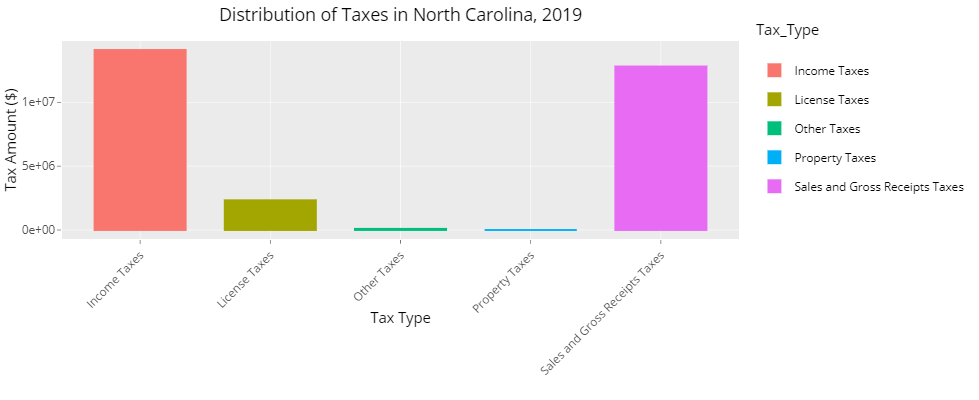

In [38]:
nb.cols <- 5
mycolors <- colorRampPalette(brewer.pal(5, "Set3"))(nb.cols)

fig <- plot_ly(df_NC_tax, labels = ~Tax_Type, values = ~AMOUNT, type = "pie", textposition = "inside", 
               marker = list(colors = mycolors), textinfo = "percent", hoverinfo = "text", text = ~paste("$", AMOUNT))
fig <- fig %>% layout(title = "Proportion of Tax Revenue in North Carolina, 2019",
                      xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
                      yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))

# fig

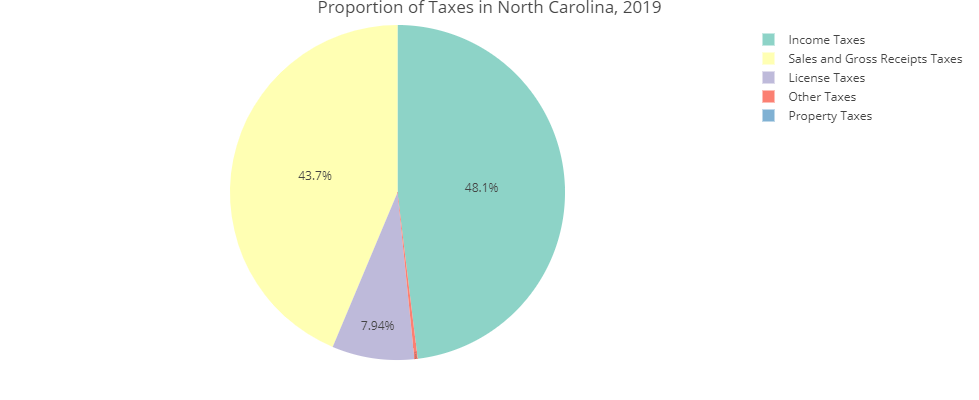

### Observations
1. It is noticeable that the total income taxes and the sales and gross receipts taxes mainly consist of about 92% of North Carolina's tax revenue in 2019.
2. It means that North Carolina profoundly counts on individuals' and corporations' income taxes and general sales taxes as its tax revenue sources.
3. Based on what is discussed in the earlier section, this tax revenue structure is vulnerable to unexpected recession that prevents individuals or corporations from generating income or that reduces the purchasing power of consumers.
4. In conclusion, it is necessary to diversify the state tax revenue sources in case of unexpected recession.

### <a href='#Table of Contents'>[Move to Table of Contents]</a>